In [1]:
!pip install numpy scikit-learn compress-fasttext xmltodict matplotlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 24.1 MB 1.9 MB/s 
  Created wheel for compress-fasttext: filename=compress_fasttext-0.1.3-py3-none-any.whl size=14601 sha256=1d43417c500527a1c8115047d9de0389cf205b126fa17bdef1392d554365cf52
  Stored in directory: /root/.cache/pip/wheels/3d/66/01/f3c7b1586e216ba9eaee878aaf55bc6725d2b171ce975d3199
Successfully built compress-fasttext
  Attempting uninstall: gensim
    Found existing installation: gensim 3.6.0
    Uninstalling gensim-3.6.0:
      Successfully uninstalled gensim-3.6.0


In [8]:
!pip install ruwordnet
!ruwordnet download
from ruwordnet import RuWordNet
wn = RuWordNet()

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
downloading a ruwordnet model from https://github.com/avidale/python-ruwordnet/releases/download/0.0.4/ruwordnet-2021.db


In [9]:
len(wn.synsets), len(wn.senses)

(59905, 154111)

# Using the thesaurus

In [10]:
for sense in wn.get_senses('замок'):
    print(sense.synset)

Synset(id="126228-N", title="СРЕДНЕВЕКОВЫЙ ЗАМОК")
Synset(id="114707-N", title="ЗАМОК ДЛЯ ЗАПИРАНИЯ")


In [11]:
wn.get_senses('замок')[0].synset.hypernyms

[Synset(id="113935-N", title="ДВОРЕЦ"),
 Synset(id="124420-N", title="КРЕПОСТЬ (ОБОРОНИТЕЛЬНОЕ СООРУЖЕНИЕ)")]

In [12]:
wn.get_senses('спаржа')[0].synset.hypernyms

[Synset(id="348-N", title="ОВОЩИ"),
 Synset(id="4789-N", title="ТРАВЯНИСТОЕ РАСТЕНИЕ"),
 Synset(id="6878-N", title="ОВОЩНАЯ КУЛЬТУРА")]

In [13]:
wn.get_senses('авокадо')

[Sense(id="144242-N-124560", name="АВОКАДО"),
 Sense(id="144305-N-124560", name="АВОКАДО"),
 Sense(id="153966-N-124560", name="АВОКАДО")]

In [14]:
veg = wn.get_senses('спаржа')[0].synset.hypernyms[0]
veg

Synset(id="348-N", title="ОВОЩИ")

In [15]:
veg.hyponyms

[Synset(id="144194-N", title="ТЫКВА (ПЛОД)"),
 Synset(id="153883-N", title="ЗЕЛЕНЬ (ОВОЩИ)"),
 Synset(id="144191-N", title="ПОМИДОР (ПЛОД)"),
 Synset(id="144205-N", title="ПАТИССОН (ПЛОД)"),
 Synset(id="118660-N", title="ЗЕЛЕНЫЙ ГОРОШЕК"),
 Synset(id="144182-N", title="ЛУК (РАСТЕНИЕ)"),
 Synset(id="144207-N", title="СТРУЧКОВЫЙ ПЕРЕЦ (ПЛОД)"),
 Synset(id="144181-N", title="БАКЛАЖАН (ПЛОД)"),
 Synset(id="107993-N", title="АРТИШОК"),
 Synset(id="144216-N", title="КАБАЧОК (ПЛОД)"),
 Synset(id="144183-N", title="ЧЕСНОК"),
 Synset(id="108482-N", title="СПАРЖА"),
 Synset(id="144232-N", title="КОЧАН КАПУСТЫ"),
 Synset(id="148896-N", title="КОРНЕПЛОДНЫЕ ОВОЩИ"),
 Synset(id="144184-N", title="ОГУРЕЦ (ПЛОД)")]

In [19]:
wn.get_senses('продукт')[0].synset.hyponyms[0].senses

[Sense(id="152327-N-741135", name="ПРОДУКТЫ ПОВСЕДНЕВНОГО СПРОСА"),
 Sense(id="152327-N-741136", name="ПРОДУКТЫ ПЕРВОЙ НЕОБХОДИМОСТИ")]

## More relations

Домен - атрибут

In [20]:
print(wn['мяч'][0].synset.domains)

[Synset(id="109383-N", title="ИГРА (РАЗВЛЕЧЕНИЕ)"), Synset(id="1622-N", title="СПОРТ")]


In [21]:
import random
print(random.sample(wn['спорт'][0].synset.domain_items, 10))

[Synset(id="113105-N", title="ГАНДБОЛИСТ"), Synset(id="121049-N", title="ГОЛ В ВОРОТА"), Synset(id="143018-N", title="СКЕЙТБОРДИНГ"), Synset(id="128562-N", title="ГИМНАСТИЧЕСКИЙ СНАРЯД"), Synset(id="4931-A", title="ИППОДРОМ"), Synset(id="10014-N", title="ТЕННИСНЫЙ КОРТ"), Synset(id="9687-A", title="ВОДНОЕ ПОЛО"), Synset(id="152306-N", title="ПЛЯЖНЫЙ ФУТБОЛ"), Synset(id="9785-N", title="АКРОБАТ"), Synset(id="113593-N", title="САНОЧНИК")]


Часть - целое

In [22]:
print(wn['автомобиль'][0].synset.meronyms)

[Synset(id="125151-N", title="БАМПЕР АВТОМОБИЛЯ"), Synset(id="126573-N", title="КУЗОВ АВТОМОБИЛЯ"), Synset(id="2653-N", title="АВТОМОБИЛЬНОЕ ОБОРУДОВАНИЕ"), Synset(id="108798-N", title="КАПОТ МАШИНЫ")]


In [23]:
print(wn['страница'][0].synset.holonyms)

[Synset(id="3790-N", title="КНИГА (ИЗДАНИЕ)"), Synset(id="5820-N", title="ТЕТРАДЬ")]


Класс-экземпляр

In [24]:
print(wn['москва-река'][0].synset.classes)

[Synset(id="136791-N", title="РЕКИ РОССИЙСКОЙ ФЕДЕРАЦИИ")]


In [25]:
print(random.sample(wn['областной центр'][0].synset.instances, 10))

[Synset(id="100244-N", title="БЛАГОВЕЩЕНСК"), Synset(id="102705-N", title="СМОЛЕНСК"), Synset(id="101703-N", title="ЛИПЕЦК"), Synset(id="102521-N", title="РОСТОВ-НА-ДОНУ"), Synset(id="100355-N", title="АСТРАХАНЬ"), Synset(id="102805-N", title="ТАМБОВ"), Synset(id="102962-N", title="УЛЬЯНОВСК"), Synset(id="102918-N", title="ТУЛА"), Synset(id="105766-N", title="ЮЖНО-САХАЛИНСК"), Synset(id="100438-N", title="БЕЛГОРОД")]


Предпосылки - выводы

In [26]:
print(wn['убить'][0].synset.premises)

[]


In [27]:
print(wn['завоевать'][0].synset.conclusions)

[Synset(id="106961-V", title="СОРЕВНОВАНИЕ, СОСТЯЗАНИЕ")]


Причины-следствия

In [30]:
print(wn['устать'][0].synset.causes)

[Synset(id="114599-V", title="УТОМИТЬ")]


In [31]:
print(wn['убить'][0].synset.effects)

[]


Частеречные синонимы

In [ ]:
[s for ss in wn['убить'][0].synset.pos_synonyms for s in ss.senses]

[Sense(id="111386-N-162803", name="УМЕРВЩЛЕНИЕ"),
 Sense(id="111386-N-686186", name="УБИЕНИЕ")]

антонимы

In [ ]:
wn['быстрый'][0].synset.antonyms

[Synset(id="118957-A", title="МЕДЛЕННЫЙ, НЕБЫСТРЫЙ")]

фразы и их составляющие

In [ ]:
wn['быстрый'][0].phrases

[Sense(id="102679-N-129996", name="РЕКА БЫСТРАЯ"),
 Sense(id="111420-N-206562", name="ПРЕДПРИЯТИЕ БЫСТРОГО ПИТАНИЯ"),
 Sense(id="111420-N-673187", name="КАФЕ БЫСТРОГО ОБСЛУЖИВАНИЯ"),
 Sense(id="111420-N-673188", name="РЕСТОРАН БЫСТРОГО ОБСЛУЖИВАНИЯ"),
 Sense(id="8930-N-117128", name="БЫСТРОЕ ПИТАНИЕ"),
 Sense(id="9241-N-118631", name="БЫСТРЫЕ ШАХМАТЫ")]

In [ ]:
wn['послужной список'][0].words

[Sense(id="106989-N-153921", name="СПИСОК")]

Однокоренные слова

In [ ]:
wn['синий'][0].derivations

[Sense(id="109476-A-205236", name="СИНЕВАТЫЙ"),
 Sense(id="109476-A-689608", name="СИНЕНЬКИЙ"),
 Sense(id="109476-N-152798", name="СИНЕВА"),
 Sense(id="109476-N-152826", name="СИНЬ"),
 Sense(id="110418-N-148452", name="ПОСИНЕНИЕ"),
 Sense(id="110418-V-148453", name="ПОСИНЕТЬ"),
 Sense(id="110418-V-152799", name="СИНЕТЬ"),
 Sense(id="111011-V-152799", name="СИНЕТЬ"),
 Sense(id="111011-V-183154", name="ЗАСИНЕТЬ")]

# Predicting hypernyms

In [ ]:
import numpy as np
import compress_fasttext

from collections import Counter
from sklearn.neighbors import KDTree

import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
ft = compress_fasttext.models.CompressedFastTextKeyedVectors.load(
    'https://github.com/avidale/compress-fasttext/releases/download/v0.0.1/ft_freqprune_100K_20K_pq_100.bin'
)

In [ ]:
def vectorize(text):
    vec = np.mean([ft[word] for word in text.lower().split() if len(word) >= 3], axis=0)
    vec /= sum(vec**2) ** 0.5 
    return vec

def distance2vote(d, a=3, b=5):
    sim = np.maximum(0, 1 - d**2/2)
    return np.exp(-d**a) * sim **b

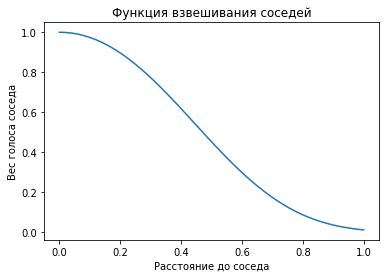

In [ ]:
x = np.linspace(0, 1)
plt.plot(x, distance2vote(x))
plt.xlabel('Расстояние до соседа')
plt.ylabel('Вес голоса соседа')
plt.title('Функция взвешивания соседей');

In [ ]:
from tqdm.auto import tqdm, trange

In [ ]:
words, vectors, synset_ids = [], [], []
for synset in tqdm(wn.synsets):
    if synset.part_of_speech != 'V':
        continue
    for sense in synset.senses:
        words.append(sense.name)
        vectors.append(vectorize(sense.name))
        synset_ids.append(synset.id)
vectors = np.stack(vectors)
tree = KDTree(vectors)

In [ ]:
votes = Counter()
dists, ids = tree.query(vectorize('кудахтать').reshape(1, -1), k=100)
for idx, distance in zip(ids[0], dists[0]):
    for hyper in wn[synset_ids[idx]].hypernyms:
        votes[hyper.id] += distance2vote(distance)
    print(words[idx], [t.title for t in wn[synset_ids[idx]].hypernyms])

БАРАХТАТЬСЯ ['ДВИЖЕНИЕ, ПЕРЕМЕЩЕНИЕ', 'ПЛЕСКАТЬСЯ В ВОДЕ']
ГОГОТАТЬ ['СМЕЯТЬСЯ (ИЗДАВАТЬ СМЕХ)', 'РАЗРАЗИТЬСЯ (БУРНО ВЫРАЗИТЬ)']
ГУКАТЬ ['ПРОИЗНЕСТИ, ВЫГОВОРИТЬ, ПРОГОВОРИТЬ']
ЮРКАТЬ ['СПРЯТАТЬСЯ В УКРЫТИЕ']
ТАРАХТЕТЬ ['ПРОИЗНЕСТИ, ВЫГОВОРИТЬ, ПРОГОВОРИТЬ', 'БОЛТАТЬ, ЧЕСАТЬ ЯЗЫКОМ']
ШМЫГАТЬ ['ДВИЖЕНИЕ, ПЕРЕМЕЩЕНИЕ']
ШМЫГАТЬ ['МЕЛЬКАТЬ ПЕРЕД ГЛАЗАМИ', 'ПРОЙТИ МИМО']
ПОНУКАТЬ ['СКЛОНИТЬ, ПОБУДИТЬ']
ХНЫКАТЬ ['ЖАЛОВАТЬСЯ (ВЫСКАЗЫВАТЬ НЕУДОВОЛЬСТВИЕ)', 'НАДОЕСТЬ']
ПОВИЗГИВАТЬ ['ИЗДАТЬ ЗВУК']
ГАВКАТЬ ['ИЗДАТЬ ЗВУК']
ФЫРКАТЬ ['ПРОИЗНЕСТИ, ВЫГОВОРИТЬ, ПРОГОВОРИТЬ', 'ВОРЧАТЬ (БОРМОТАТЬ)']
ФЫРЧАТЬ ['ПРОИЗНЕСТИ, ВЫГОВОРИТЬ, ПРОГОВОРИТЬ', 'ВОРЧАТЬ (БОРМОТАТЬ)']
УРЧАТЬ ['ИЗДАТЬ ЗВУК']
НАУСЬКИВАТЬ ['НАПАСТЬ, СОВЕРШИТЬ НАПАДЕНИЕ', 'ПРЕСЛЕДОВАТЬ, ГНАТЬСЯ']
НАУСЬКИВАТЬ ['ПОДСТРЕКАТЬ, ПРОВОЦИРОВАТЬ', 'ПОРТИТЬ ОТНОШЕНИЯ']
СВИХИВАТЬСЯ ['ЗАБОЛЕТЬ БОЛЕЗНЬЮ']
ДОКРИКИВАТЬСЯ ['ДОЗВАТЬСЯ']
ДОКРИКИВАТЬСЯ ['ДОВЕСТИ СЕБЯ', 'НАВРЕДИТЬ СЕБЕ']
ЖАЛОБНО ВЫТЬ ['ВЫТЬ', 'ВИЗЖАТЬ']
МЕТАТЬСЯ КАК УГОРЕЛЫЙ ['БЕЖАТЬ (ДВИГАТЬСЯ

In [ ]:
for sid, score in votes.most_common(10):
    print(score,  wn[sid].title)

0.6925543543920146 ИЗДАТЬ ЗВУК
0.4306341411813687 ПРОИЗНЕСТИ, ВЫГОВОРИТЬ, ПРОГОВОРИТЬ
0.29578542267095376 ДВИЖЕНИЕ, ПЕРЕМЕЩЕНИЕ
0.21784698084743057 СМЕЯТЬСЯ (ИЗДАВАТЬ СМЕХ)
0.19409141918335493 ПЛЕСКАТЬСЯ В ВОДЕ
0.1325509436427577 РАЗРАЗИТЬСЯ (БУРНО ВЫРАЗИТЬ)
0.11629879019881803 БОЛТАТЬ, ЧЕСАТЬ ЯЗЫКОМ
0.11420901282482374 УДАРИТЬ, НАНЕСТИ УДАР
0.11343697413233847 ШЕВЕЛИТЬ ЧАСТЬЮ ТЕЛА
0.11267866978103516 КРИЧАТЬ, ИЗДАВАТЬ КРИК


# Найди лишнее 
ДИВАН, ШКАФ, ЛАМПА, СТОЛ

In [ ]:
import math


def get_all_hypernyms(wn, word, max_level=100):
    """ Return dict of all hypernyms of a word and their distances """
    front = [sense.synset for sense in wn.get_senses(word)]
    levels = {}
    for level in range(max_level):
        if not front:
            break
        new_front = []
        for synset in front:
            if synset.id not in levels:
                levels[synset.id] = level
                new_front.extend(synset.hypernyms)
        front = new_front
    return levels

def get_closest_common(levels1, levels2):
    """ Find the closest common hypernym and sum of distances to it"""
    result = None
    result_distance = math.inf
    for id, distance in levels1.items():
        if id in levels2:
            total = distance + levels2[id]
            if total < result_distance:
                result_distance = total
                result = id
    return result, result_distance

In [ ]:
words = ['ДИВАН', 'ШКАФ', 'ЛАМПА', 'СТОЛ']
print('\t\t', '\t'.join(words))
for w1 in words:
    print(w1, end='\t')
    for w2 in words:
        n, d = get_closest_common(get_all_hypernyms(wn, w1), get_all_hypernyms(wn, w2))
        print(d, end='\t\t')
    print()

		 ДИВАН	ШКАФ	ЛАМПА	СТОЛ
ДИВАН	0		3		10		3		
ШКАФ	3		0		5		2		
ЛАМПА	10		5		0		7		
СТОЛ	3		2		7		0		


In [ ]:
name, distance = get_closest_common(get_all_hypernyms(wn, 'лампа'), get_all_hypernyms(wn, 'шкаф'))
print(distance, name, wn[name].title)

5 106555-N ТЕХНИЧЕСКОЕ УСТРОЙСТВО


In [ ]:
for k, v in get_all_hypernyms(wn, 'лампа').items():
    print(k, v, wn[k])

128561-N 0 Synset(id="128561-N", title="ОСВЕТИТЕЛЬНЫЙ ПРИБОР")
8785-N 0 Synset(id="8785-N", title="ЭЛЕКТРИЧЕСКАЯ ЛАМПА")
107646-N 1 Synset(id="107646-N", title="ИСТОЧНИК ОСВЕЩЕНИЯ")
4222-N 1 Synset(id="4222-N", title="СВЕТОТЕХНИЧЕСКОЕ ОБОРУДОВАНИЕ")
106488-N 2 Synset(id="106488-N", title="ИСХОДНЫЙ ПУНКТ")
2070-N 2 Synset(id="2070-N", title="ЭЛЕКТРОТЕХНИЧЕСКОЕ ОБОРУДОВАНИЕ")
106613-N 3 Synset(id="106613-N", title="РОЛЬ, ПОЛОЖЕНИЕ, МЕСТО")
149201-N 3 Synset(id="149201-N", title="ИНЖЕНЕРНОЕ ОБОРУДОВАНИЕ")
106555-N 4 Synset(id="106555-N", title="ТЕХНИЧЕСКОЕ УСТРОЙСТВО")
1320-N 4 Synset(id="1320-N", title="ОБОРУДОВАНИЕ")
106553-N 5 Synset(id="106553-N", title="ПРИСПОСОБЛЕНИЕ, ИНСТРУМЕНТ")
106554-N 6 Synset(id="106554-N", title="ПРЕДМЕТ, ВЕЩЬ")
147133-N 7 Synset(id="147133-N", title="ФИЗИЧЕСКИЙ ОБЪЕКТ")
147134-N 8 Synset(id="147134-N", title="ФИЗИЧЕСКАЯ СУЩНОСТЬ")
153782-N 9 Synset(id="153782-N", title="ПОСТОЯННАЯ СУЩНОСТЬ")


In [ ]:
wn["149201-N"].hypernyms

[Synset(id="106555-N", title="ТЕХНИЧЕСКОЕ УСТРОЙСТВО"),
 Synset(id="1320-N", title="ОБОРУДОВАНИЕ")]

In [ ]:
for k, v in get_all_hypernyms(wn, 'стол').items():
    print(k, v, wn[k])

107294-N 0 Synset(id="107294-N", title="СТОЛ")
146834-N 0 Synset(id="146834-N", title="СТОЛ ДЛЯ ЕДЫ")
106554-N 1 Synset(id="106554-N", title="ПРЕДМЕТ, ВЕЩЬ")
1253-N 1 Synset(id="1253-N", title="МЕБЕЛЬ")
147133-N 2 Synset(id="147133-N", title="ФИЗИЧЕСКИЙ ОБЪЕКТ")
130019-N 2 Synset(id="130019-N", title="НЕПРОДОВОЛЬСТВЕННЫЕ ТОВАРЫ")
146828-N 2 Synset(id="146828-N", title="ПРЕДМЕТ ИНТЕРЬЕРА")
9059-N 2 Synset(id="9059-N", title="ПРОДУКЦИЯ ДЕРЕВООБРАБОТКИ")
147134-N 3 Synset(id="147134-N", title="ФИЗИЧЕСКАЯ СУЩНОСТЬ")
1252-N 3 Synset(id="1252-N", title="ПОТРЕБИТЕЛЬСКИЕ ТОВАРЫ")
56-N 3 Synset(id="56-N", title="ПРОМЫШЛЕННАЯ ПРОДУКЦИЯ")
562-N 3 Synset(id="562-N", title="ТОВАР")
106507-N 3 Synset(id="106507-N", title="ПРОДУКТ ПРОИЗВОДСТВА")
153782-N 4 Synset(id="153782-N", title="ПОСТОЯННАЯ СУЩНОСТЬ")
106505-N 4 Synset(id="106505-N", title="ПРОДУКТ ТРУДА")


# Word sense disambiguation 

зАмок или замОк ?

Примитивный алгоритм: для каждого значения находим синонимы и проверяем, какие ближе по fasttext-эмбеддингу к словам контекста.

Для верности, стоило бы кроме синонимов взять ещё и ко-гипонимы. 

In [ ]:
import razdel

In [ ]:
context = '''Сначала шов слегка уплотняем молоточком, затем прочеканиваем на нём замок 
― бороздку, называемую "зигом", которая будет препятствовать расхождению шва при дальнейшем его уплотнении.'''
word = 'замок'

In [ ]:
def disambiguate(word, context):
    candidates = [s.synset for s in wn[word]]
    text_vector = vectorize(' '.join(t.text for t in razdel.tokenize(context) if t.text != word))
    candidate_vectors = [
        vectorize(' '.join(w for s in c.senses for w in s.name.lower().split() if name != word))
        for c in candidates
    ]
    scores = [np.dot(text_vector, v) for v in candidate_vectors]
    return dict(zip(scores, candidates))

disambiguate(word, context)

{0.42644112415415647: Synset(id="126228-N", title="СРЕДНЕВЕКОВЫЙ ЗАМОК"),
 0.48645881572125504: Synset(id="114707-N", title="ЗАМОК ДЛЯ ЗАПИРАНИЯ")}

In [ ]:
context = '''Издали видны королевский замок Вавель и кафедральный собор Святых Вацлава и Станислава 
― настоящие шедевры зодчества.'''
disambiguate(word, context)

{0.503628168496375: Synset(id="126228-N", title="СРЕДНЕВЕКОВЫЙ ЗАМОК"),
 0.43922931199345167: Synset(id="114707-N", title="ЗАМОК ДЛЯ ЗАПИРАНИЯ")}